# Predicting Health Insurance Premiums with Machine Learning

## Problem Statement: 
In the health insurance industry, setting accurate premium prices is crucial for both insurers and policyholders. Traditional methods rely heavily on broad actuarial tables and historical averages, which often fail to capture the unique health profiles and risks of individuals. This can result in either underestimated premiums, leading to financial losses for insurers, or overestimated premiums, which may drive away potential customers.

This project leverages machine learning to address these challenges by predicting health insurance costs based on individual attributes, such as age, medical history, and lifestyle factors. By creating a model tailored to individual risk profiles, insurers can set fair and precise premiums that reflect each person's specific health characteristics. This approach aims to enhance pricing precision, increase competitiveness, and improve customer satisfaction, ultimately enabling personalized insurance offerings and better risk management.
Through this machine learning solution, insurers can make data-driven decisions that lead to more competitive rates, strategic market insights, and improved customer engagement, paving the way for a more customer-centric insurance industry.

## Features Profiling: 

The dataset comprises the following 986 rows and 11 attributes: 
- **1. Age:** Numeric, ranging from 18 to 66 years.
- **2. Diabetes:** Binary (0 or 1), where 1 indicates the presence of diabetes.
- **3. BloodPressureProblems:** Binary (0 or 1), indicating the presence of blood pressure-related issues.
- **4. AnyTransplants:** Binary (0 or 1), where 1 indicates the person has had a transplant.
- **5. AnyChronicDiseases:** Binary (0 or 1), indicating the presence of any chronic diseases.
- **6. Height:** Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
- **7. Weight:** Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
- **8. KnownAllergies:** Binary (0 or 1), where 1 indicates known allergies.
- **9. HistoryOfCancerInFamily:** Binary (0 or 1), indicating a family history of cancer.
- **10. NumberOfMajorSurgeries:** Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
- **11. PremiumPrice:** Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


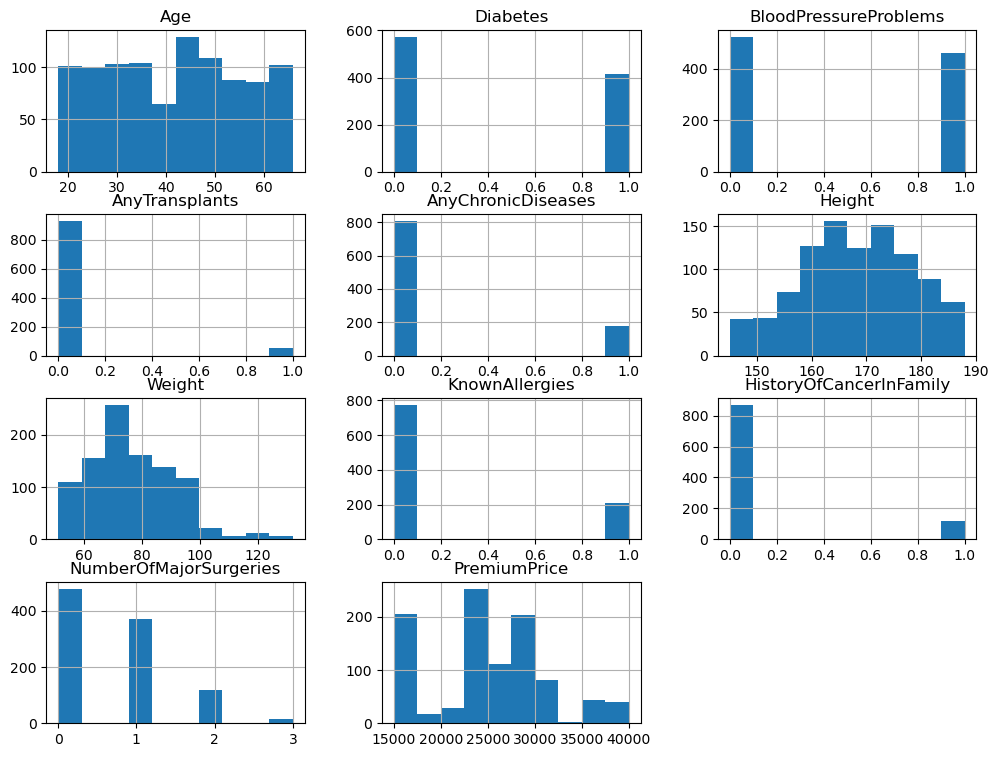

In [3]:
# histogram for each feature
df.hist(figsize=(12,9))
plt.show()

**Insights from Histogram:**

1. **Age:**
The age distribution is relatively uniform across different age ranges, with a slight peak around the 40–50 age range. This indicates a balanced age distribution among the insured individuals.

2. **Diabetes:**
The majority of people do not have diabetes (0), with a much smaller portion having diabetes (1). This could imply that diabetes is not very common in this insured group.

3. **BloodPressureProblems:**
Similar to diabetes, most individuals do not have blood pressure issues (0), though a significant minority does. This could indicate an overall healthier insured population or a higher number of people without chronic health issues.

4. **AnyTransplants:**
The vast majority of individuals have not had any transplants (0), with very few having undergone a transplant (1). This suggests that transplants are rare in the dataset and may not have a strong impact on the premium.

5. **AnyChronicDiseases:**
A large proportion of individuals do not have chronic diseases (1), indicating that chronic health issues are not relatively common in this population.

6. **Height:**
The height distribution is bell-shaped, suggesting a normal distribution around an average height range. Most people fall between 160–180 cm, which aligns with average human height.

8. **Weight:**
Weight distribution skews towards the lower range, with a peak around 60–80 kg. There are fewer individuals with high weights, possibly indicating a mostly average-weight population.

9. **KnownAllergies:**
Most individuals do not have known allergies (0), but a smaller portion has allergies (1). This could suggest that known allergies might not significantly affect premium prices or might be less common in this insured group.

10. **HistoryOfCancerInFamily:**
The histogram shows that a majority of individuals do not have a family history of cancer (0), while a small proportion does (1). Family history of cancer might therefore be a potential risk factor but is less common.

11. **NumberOfMajorSurgeries:**
Most individuals have not had major surgeries, with the majority having 0 surgery. This could imply that prior surgeries are relatively rare in this group and may influence premium costs.

12. **PremiumPrice:**
The premium prices seem to have a varied distribution with peaks around certain values, suggesting specific price brackets are common. This could mean that most insured individuals fall within certain risk categories that align with these premium brackets.

These insights can guide further analysis, helping to determine factors that impact premium pricing, such as age, weight, chronic diseases, and family health history. It’s also notable that most binary health variables (like diabetes, transplants, and cancer history) show that the healthier outcome is more common, which might imply that healthier individuals are more likely to be insured.

In [4]:
# checking the missing values
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [5]:
df.describe().T # descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [6]:
df.shape  # no. of rows and columns

(986, 11)

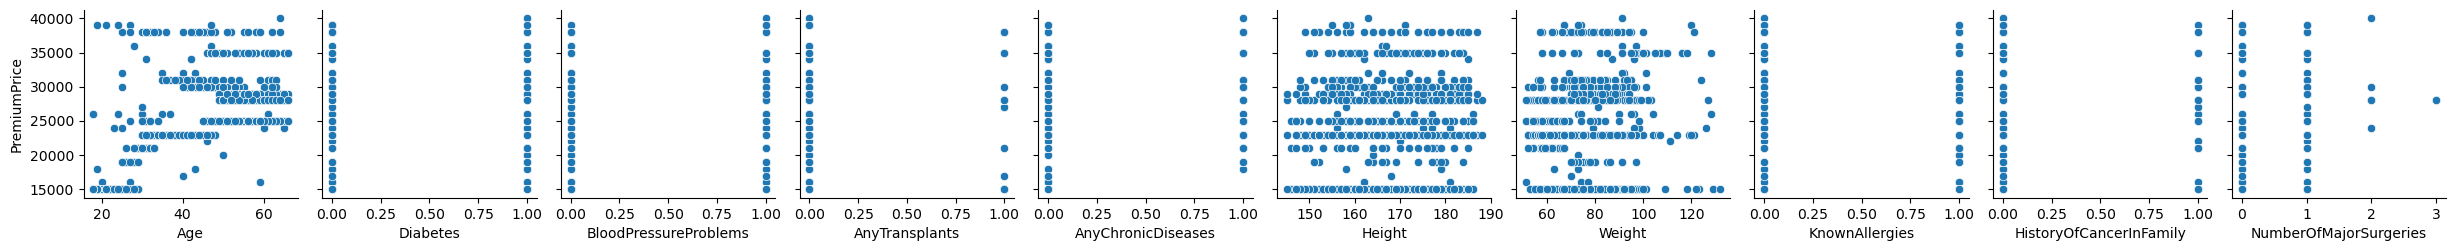

In [7]:
sns.pairplot(df, y_vars=["PremiumPrice"], x_vars=df.drop("PremiumPrice", axis=1).columns)
plt.show()

**Insights from paiplot:**

1. **Age vs. PremiumPrice:**
Premium prices seem to vary with age, but there is no clear linear trend.
Individuals in the age range of 20–40 appear to have a wider spread of premium prices, whereas premiums for older individuals are relatively concentrated at specific price points.

2. **Diabetes, BloodPressureProblems, AnyTransplants, and AnyChronicDiseases:**
These binary features (0 or 1) show no significant trend with "PremiumPrice".
Premium prices are distributed across both values, indicating these factors alone might not strongly influence premium amounts.

3. **Height vs. PremiumPrice:**
There’s a moderate spread of premium prices across different heights, but no strong linear correlation.
Premium prices do not seem to vary significantly by height.

4. **Weight vs. PremiumPrice:**
Weight shows some variability in premium pricing, especially for weights between 60–100.
Higher weights do not appear to have a significant effect on premium pricing.

5. **KnownAllergies:**
Similar to other binary variables, there’s no clear trend between known allergies and premium prices.

6. **HistoryOfCancerInFamily:**
People with a family history of cancer have a range of premium prices similar to those without, indicating limited influence of this factor on premiums.

7. **NumberOfMajorSurgeries vs. PremiumPrice:**
Higher numbers of surgeries show a minor trend towards higher premiums, although data is sparse at higher surgery counts.
This might indicate that people with more surgeries are at a higher risk, leading to slightly higher premiums.
Overall, while individual features like Age, Weight, and NumberOfMajorSurgeries show some variation in premium prices, most binary health indicators do not have strong visible trends with premium amounts in this dataset.

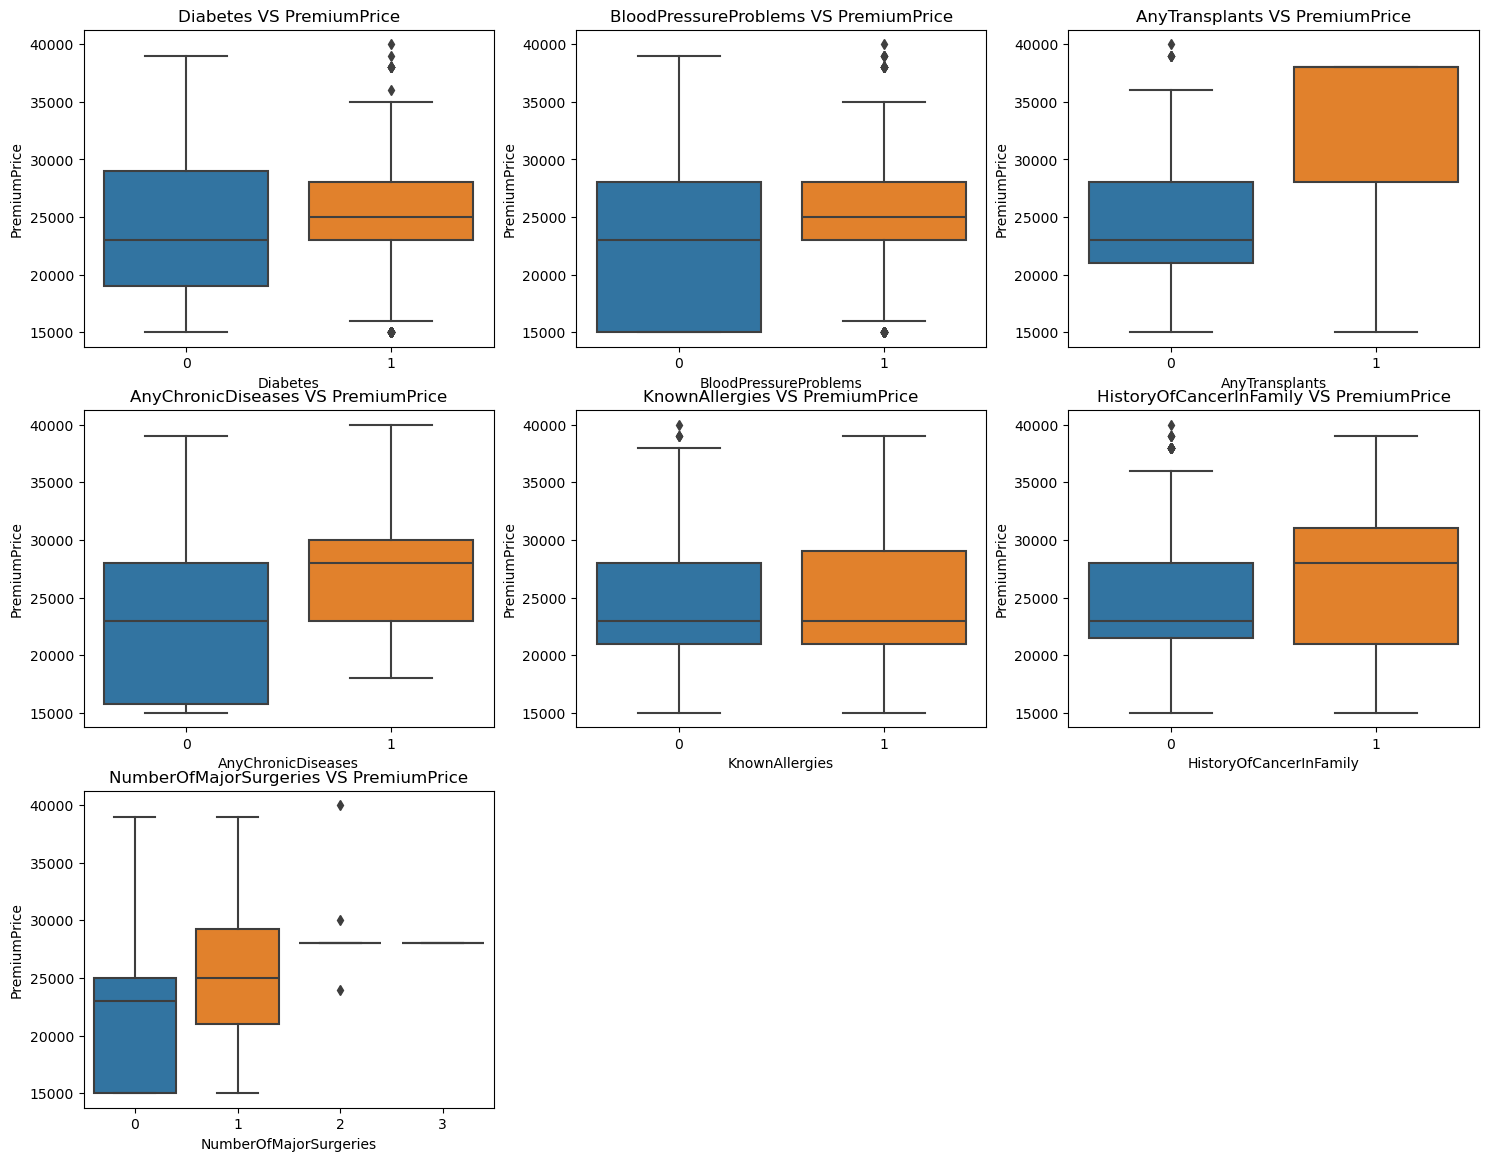

In [8]:
# check the box plot of binary features
bin_feature = ["Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases",                          
                "KnownAllergies", "HistoryOfCancerInFamily", "NumberOfMajorSurgeries"] 
plt.figure(figsize = (18,14))
for i in range(len(bin_feature)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df, x = bin_feature[i], y = "PremiumPrice")
    plt.title(f"{bin_feature[i]} VS PremiumPrice")



**Insights:**

**1. Diabetes:** Customers with diabetes tend to have slightly higher premium prices, though the difference is moderate.

**2. Blood Pressure Problems:** Premium prices for individuals with blood pressure problems are relatively similar to those without, with only a minor increase on average.

**3. Any Transplants:** Customers who have had transplants seem to pay a noticeably higher premium, **indicating that this may be a significant factor in determining premium costs**.

**4. Any Chronic Diseases:** Presence of chronic diseases generally leads to higher premium prices. This may indicate that chronic diseases are factored into higher premium calculations.

**5. Known Allergies:** There is no substantial difference in premium prices for individuals with or without known allergies, suggesting it may not heavily impact premium rates.

**6. History of Cancer in Family:** Family history of cancer has minimal impact on premium prices, as the distributions are similar for those with and without a history.

**7. Number of Major Surgeries:** Customers who have undergone more major surgeries seem to have higher premiums, although the sample size for higher numbers of surgeries may be limited.



- High-Risk Health Factors like transplants, chronic diseases, and multiple major surgeries appear to correlate with higher premium prices.
Moderate Impact Factors like diabetes show some increase in premium, though less pronounced.

- Low-Impact Factors such as blood pressure issues, family history of cancer, and allergies seem to have minimal influence on premium adjustments.
- These insights suggest that premium pricing is largely influenced by health factors directly impacting risk levels, such as major surgeries or chronic diseases.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age', ylabel='PremiumPrice'>

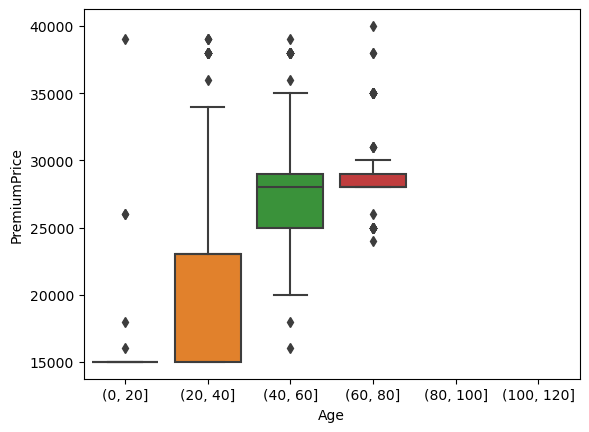

In [9]:
bin = [0,20,40,60,80,100,120]
s = pd.cut(df["Age"], bins = bin)
sns.boxplot(x = s, y = df["PremiumPrice"])

**Insights:**


1. Age 0-20: There is minimal variance in PremiumPrice, with values concentrated at the lower end of the scale. This could indicate lower premium rates for younger individuals in this age range.

2. Age 20-40: The PremiumPrice for this age range has a wider range, with a greater number of outliers. This age group experiences significant variability in premium costs, possibly due to a combination of health risk factors that start to emerge in this age range.

3. Age 40-60: The median premium is higher than for the 20-40 age range, and the spread of prices is more compact, indicating that premium prices are more consistent for this age group. However, outliers suggest there are still some individuals paying substantially more.

4. Age 60-80: This age group has the highest median premium, with a relatively narrow spread, indicating consistent high premium prices. This is expected, as older individuals often face higher health risks, which typically lead to higher insurance premiums.

5. Outliers: Each age range has a number of outliers, representing individuals with significantly different premium prices, potentially due to specific health conditions or additional coverage requirements.

- Overall, the box plot illustrates a trend where PremiumPrice tends to increase with age, which is common in insurance due to increasing health risks. The variability within each group also suggests that factors other than age, such as health conditions or coverage level, play a role in determining the premium price.

<Axes: >

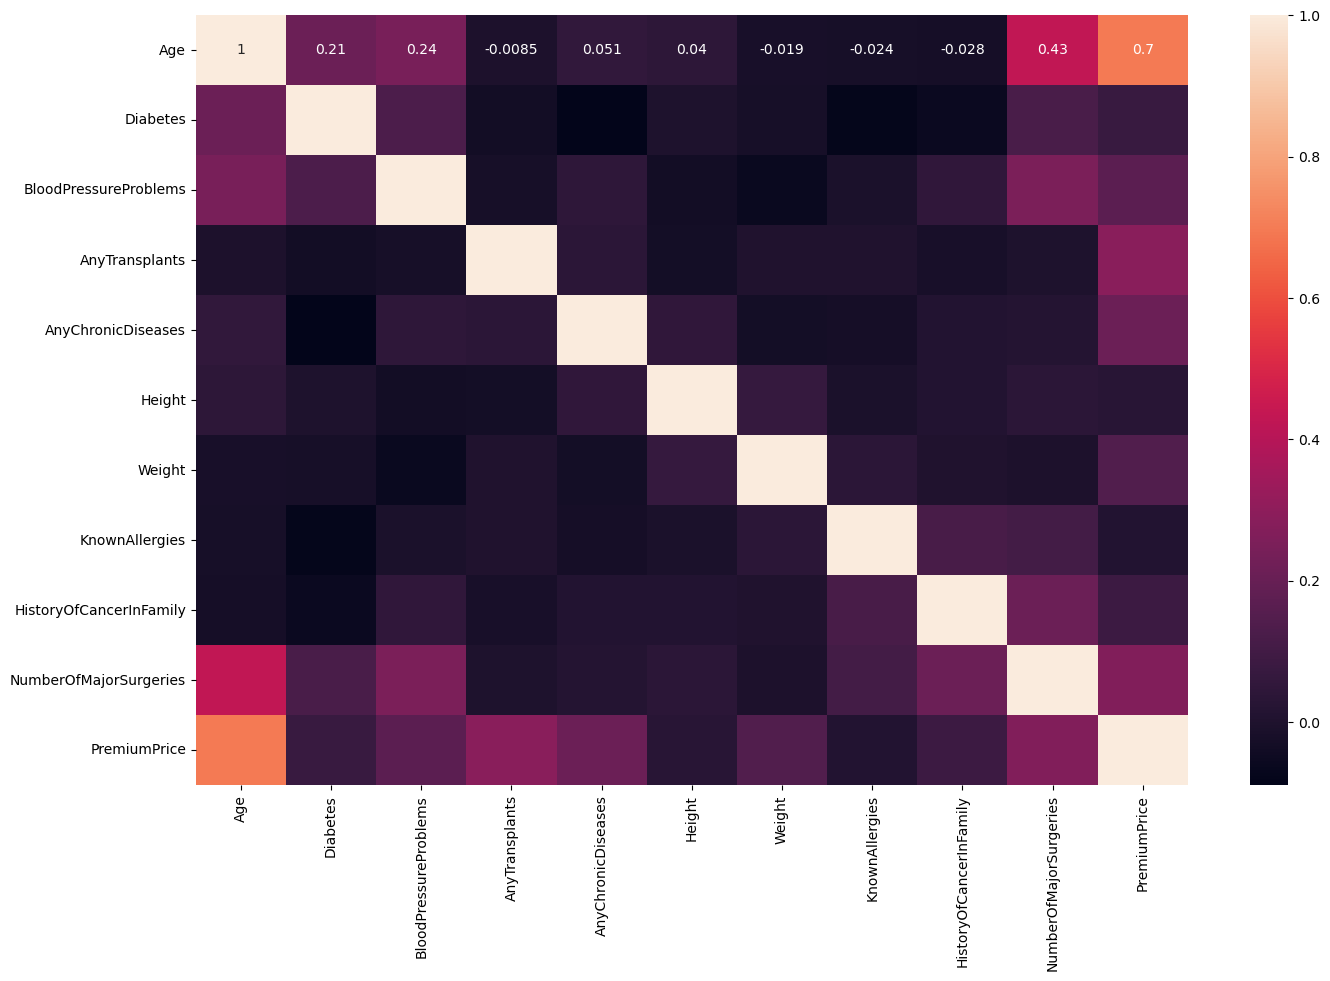

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

**Insights:**

1. **PremiumPrice:**
PremiumPrice shows the strongest positive correlation with Age (0.70), suggesting that as individuals get older, their premium prices tend to increase. This is expected due to the increasing health risks associated with age.

2. **Other Significant Correlations:**
Age and NumberOfMajorSurgeries show a moderate positive correlation (0.43). Older individuals are likely to have had more surgeries, which can influence premium prices.
BMI and Weight have a strong correlation, as expected, because BMI is directly calculated from weight and height.

3. **Weak Correlations:**
Other features, such as Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, and KnownAllergies, show weak or negligible correlations with PremiumPrice. These variables might not be strong determinants of the premium in this dataset or might need to be examined in conjunction with other features.
Feature Independence:

- Most features show very low correlations with each other, suggesting a relatively low multicollinearity. This can be advantageous when building predictive models, as each feature may add unique information to the model.
In summary, Age and NumberOfMajorSurgeries appear to be the most influential factors related to PremiumPrice, with BMI and Weight also showing a strong interdependence. Other health conditions might play a lesser role in determining premium costs in this dataset.








In [11]:
df.shape


(986, 11)

In [12]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# Hypothesis Testing

### 1. Check whether Diabetes having statistically significant affect on PremiumPrice
- Null Hypothesis: Feature Diabetes has no affect on PremiumPrice
- Alternate Hypotehsis: Feature Diabetes affect the PremiumPrice

In [13]:
a = df["Diabetes"].astype("bool")

In [14]:
diab_0 = df.loc[df["Diabetes"] ==0][["PremiumPrice"]]
diab_1 = df.loc[df["Diabetes"] ==1][["PremiumPrice"]]

In [15]:
diab_0 = df.loc[df["Diabetes"] ==0][["PremiumPrice"]]
diab_1 = df.loc[df["Diabetes"] ==1][["PremiumPrice"]]

from scipy.stats import ttest_ind
t_test, p_value = ttest_ind(diab_0, diab_1)
print(t_test[0])
print("p-value:" , p_value[0])

-2.3975629574233563
p-value: 0.016690091385306107


**Insights:**
- From the data it shows that diabetes feature has small affect on PremiumPrice, but from the Hypothesis Testing - we can conclude that diabetes feature is statistically significant with PremiumPrice as the p-value < 0.05. 

### 2. Check whether BloodPressureProblems having statistically significant affect on PremiumPrice
 - Null Hypothesis: Feature BloodPressureProblems has no affect on PremiumPrice
 - Alternate Hypotehsis: Feature BloodPressureProblems affect the PremiumPrice

In [16]:
bp_0 = df.loc[df["BloodPressureProblems"] ==0][["PremiumPrice"]]
bp_1 = df.loc[df["BloodPressureProblems"] ==1][["PremiumPrice"]]

In [17]:
from scipy.stats import ttest_ind
t_test, p_value = ttest_ind(bp_0, bp_1)
print(t_test)
print("p-value:" , p_value[0])

[-5.31636556]
p-value: 1.3100497090721932e-07


**Insights:**

- From the data it shows that BloodPressureProblems feature has less corelation with PremiumPrice, but from the Hypothesis Testing - we can conclude that BloodPressureProblems feature is statistically significant with PremiumPrice as the p-value < 0.05.

### 3. Check whether AnyTransplants having statistically significant affect on PremiumPrice
- Null Hypothesis: Feature AnyTransplants has no affect on PremiumPrice
- Alternate Hypotehsis: Feature AnyTransplants affect the PremiumPrice

In [18]:
at_0 = df.loc[df["AnyTransplants"] ==0][["PremiumPrice"]]
at_1 = df.loc[df["AnyTransplants"] ==1][["PremiumPrice"]]

In [19]:
t_test, p_value = ttest_ind(at_0, at_1)
print(t_test)
print("p-value:" , p_value[0])

[-9.47165445]
p-value: 1.9787295423632775e-20


**Insights:**

From the data it shows that AnyTransplants feature is not corelated with PremiumPrice, but from the Hypothesis Testing - we can conclude that AnyTransplants feature is statistically significant with PremiumPrice as the p-value < 0.05.

### 4. Check whether AnyChronicDiseases having statistically significant affect on PremiumPrice
- Null Hypothesis: Feature AnyChronicDiseases has no affect on PremiumPrice
- Alternate Hypotehsis: Feature AnyChronicDiseases affect the PremiumPrice

In [20]:
ac_0 = df.loc[df["AnyChronicDiseases"] == 0][["PremiumPrice"]]
ac_1 = df.loc[df["AnyChronicDiseases"] == 1][["PremiumPrice"]]

In [21]:
t_test, p_value = ttest_ind(ac_0, ac_1)
print(t_test)
print("p-value:" , p_value[0])

[-6.69104573]
p-value: 3.713413765291482e-11


**Insights:**

From the data it shows that **AnyChronicDiseases** feature is not corelated with PremiumPrice, but from the Hypothesis Testing - we can conclude that **AnyChronicDiseasesfeature** is statistically significant with PremiumPrice as the p-value < 0.05.

### 5. Check whether KnownAllergies having statistically significant affect on PremiumPrice¶
- Null Hypothesis: Feature KnownAllergies has no affect on PremiumPrice
- Alternate Hypotehsis: Feature KnownAllergies affect the PremiumPrice

In [22]:
ka_0 = df.loc[df["KnownAllergies"] == 0][["PremiumPrice"]]
ka_1 = df.loc[df["KnownAllergies"] == 1][["PremiumPrice"]]

In [23]:
t_test, p_value = ttest_ind(ka_0, ka_1)
print(t_test)
print("p-value:" , p_value[0])

[-0.37967752]
p-value: 0.7042667378180334


**Insights:**

From the data it shows that KnownAllergies feature is not corelated with PremiumPrice, and that too prooved by the hypothesis testing that **KnownAllergies** feature has no affect on PremiumPrice as the p-value > 0.05.

### 6. Check whether HistoryOfCancerinFamily having statistically significant affect on PremiumPrice¶

 - Null Hypothesis: Feature HistoryOfCancerinFamily has no affect on PremiumPrice
 - Alternate Hypotehsis: Feature HistoryOfCancerinFamily affect the PremiumPrice


In [24]:
hc_0 = df.loc[df["HistoryOfCancerInFamily"] == 0][["PremiumPrice"]]
hc_1 = df.loc[df["HistoryOfCancerInFamily"] == 1][["PremiumPrice"]]

In [25]:
t_test, p_value = ttest_ind(hc_0, hc_1)
print(t_test)
print("p-value:" , p_value[0])

[-2.61704198]
p-value: 0.009005587310447026


**Insights:**

- From the data it shows that HistoryOfCancerInFamily feature is not corelated with PremiumPrice, but from the Hypothesis Testing - we can conclude that HistoryOfCancerInFamily feature is statistically significant with PremiumPrice as the p-value < 0.05.

### 7 . Check whether NumberOfMajorSurgeries having statistically significant affect on PremiumPrice¶

 - Null Hypothesis: Feature NumberOfMajorSurgeries has no affect on PremiumPrice
 - Alternate Hypotehsis: Feature NumberOfMajorSurgeries affect the PremiumPrice

In [26]:
nm_0 = df.loc[df["NumberOfMajorSurgeries"] == 0][["PremiumPrice"]]
nm_1 = df.loc[df["NumberOfMajorSurgeries"] == 1][["PremiumPrice"]]

In [27]:
t_test, p_value = ttest_ind(nm_0, nm_1)
print(t_test)
print("p-value:" , p_value[0])

[-3.97103819]
p-value: 7.762389453359044e-05


**Insights:**

- From the data it shows that NumberOfMajorSurgeries  feature is not corelated with PremiumPrice, but from the Hypothesis Testing - we can conclude that NumberOfMajorSurgeries  feature is statistically significant with PremiumPrice as the p-value < 0.05.

### 8. Check whether Age having statistically significant affect on PremiumPrice

- Null Hypothesis: Feature Age has no affect on PremiumPrice
- Alternate Hypotehsis: Feature Age affect the PremiumPrice

In [28]:

from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df["Age"], df["PremiumPrice"])

# Display result
print("correlation_coefficient;",correlation_coefficient)
print("p-value:",p_value)


correlation_coefficient; 0.6975399655058004
p-value: 1.3225071578359973e-144


**Insights:**

- From the data it shows that Age feature is corelated with PremiumPrice, and that is prooved by Hypothesis Testing as well as the  p-value < 0.05.


### 9. Check whether Weight having statistically significant affect on PremiumPrice

- Null Hypothesis: Feature Weight has no affect on PremiumPrice
- Alternate Hypotehsis: Feature Weight affect the PremiumPrice

In [29]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df["Weight"], df["PremiumPrice"])

# Display result
print("correlation_coefficient;",correlation_coefficient)
print("p-value:",p_value)


correlation_coefficient; 0.14150740525639732
p-value: 8.186473650456629e-06


**Insights:**

From the data it shows that Weight feature is corelated with PremiumPrice, and that is prooved by Hypothesis Testing as well as the p-value < 0.05.

**Final Insights from Hypothesis Testing:**

- From the Hypothesis testing we draw following conclusions.
1. Person Having Diabetes should have higher premium price in comparision to someone who is not having Diabetes.
2. Person Having BloodPressureProblems should have higher premium price in comparision to someone who is not having BloodPressureProblems.
3. Person Have gone through any kind of transplant should have higher premium price in comparision to someone who has not.
4. Person Having AnyChronicDiseases should have higher premium price in comparision to someone who is not having AnyChronicDiseases.
5. **Person Having any KnownAllergies do not have affect on PremiumPrice**.
6. Person Having any HistoryOfCancerInFamily should have higher premium price in comparision to someone who is not having any History.
7. Person Have gone through NumberOfMajorSurgeries should have higher premium price in comparision to someone who has not gone through any major surgeries.
8. Person having high Age should have higher premium price.
9. Person Having hight BMI should have higher premium price.

In [30]:
# dropping Known allergies featire as it not statistically significant
df.drop("KnownAllergies", axis=1, inplace=True)

In [31]:
# removing the outliers from PremiumPrice feature
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    print(lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound)

    # Identify outliers
    df_out = df[(df[column] >lower_bound) & (df[column] < upper_bound)]
    
    return df_out


In [32]:
df_2 = detect_outliers(df, "PremiumPrice")
df_2.head()

10500.0
38500.0


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,25000
1,60,1,0,0,0,180,73,0,0,29000
2,36,1,1,0,0,158,59,0,1,23000
3,52,1,1,0,1,183,93,0,2,28000
4,38,0,0,0,1,166,88,0,1,23000


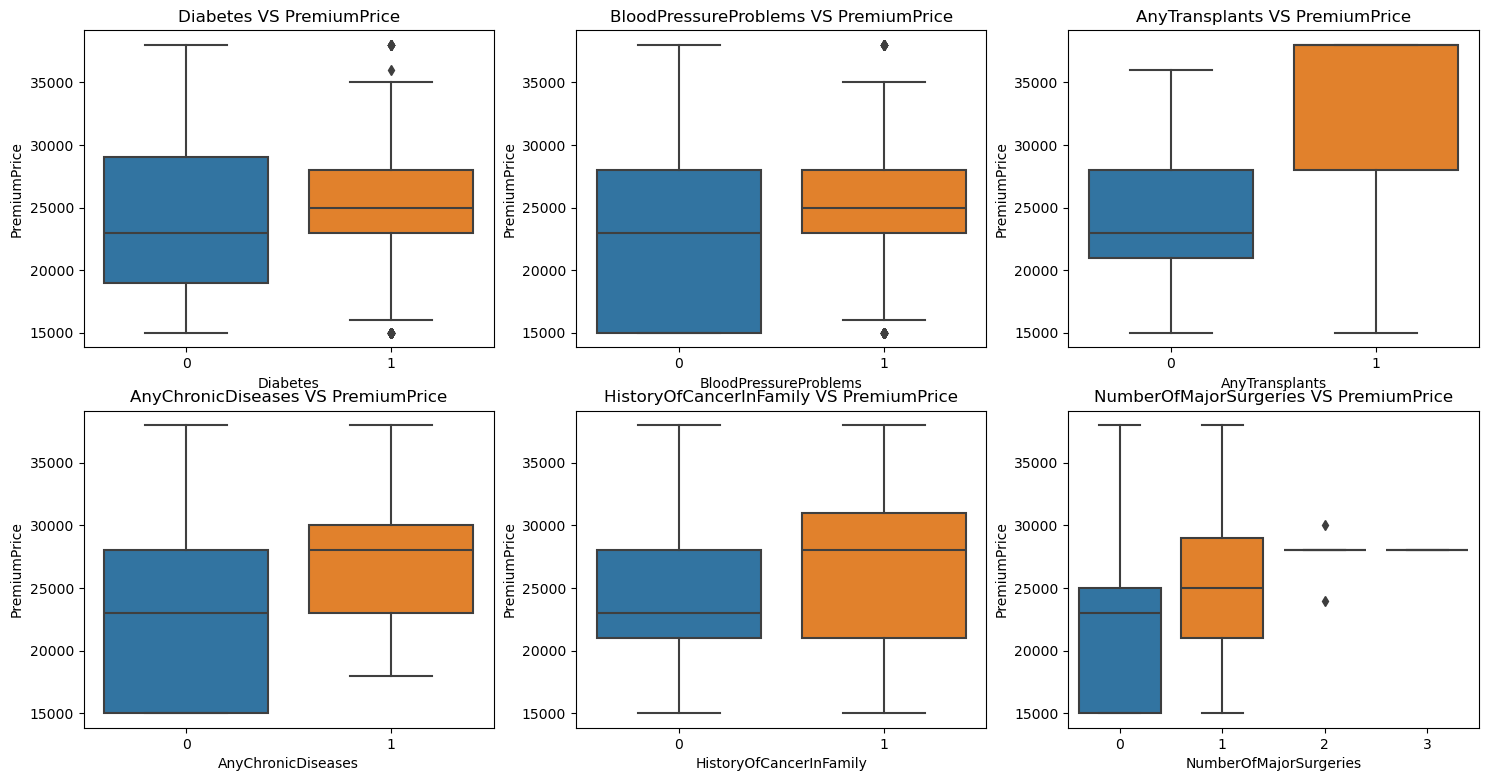

In [33]:
# check the box plot of binary features
bin_feature = ["Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases",                          
             "HistoryOfCancerInFamily", "NumberOfMajorSurgeries"] 
plt.figure(figsize = (18,14))
for i in range(len(bin_feature)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df_2, x = bin_feature[i], y = "PremiumPrice")
    plt.title(f"{bin_feature[i]} VS PremiumPrice")


**Insights:**


The box plots shown compare PremiumPrice against several medical and personal factors, each represented as either binary (0 or 1) or categorical values. Here's a summary after removing outliers:

**1. Diabetes vs PremiumPrice:** People with diabetes (1) tend to have slightly higher median premiums than those without (0), though the premium range for both groups remains similar.

**2. Blood Pressure Problems vs PremiumPrice:** Individuals with blood pressure issues (1) generally have a higher premium median compared to those without (0). However, the spread (range) of premiums remains consistent across both groups.

**3. Any Transplants vs PremiumPrice:** People with a history of transplants (1) have significantly higher premiums on average, suggesting that transplant history strongly impacts premium costs.

**4. Any Chronic Diseases vs PremiumPrice:** Those with chronic diseases (1) tend to have a slightly higher median premium compared to those without (0), although the overall range is broad for both groups.

**5. History of Cancer in Family vs PremiumPrice:** Family history of cancer appears to have minimal impact on premium median or spread, as both groups (0 and 1) display similar ranges and median values.

**6. Number of Major Surgeries vs PremiumPrice:** Individuals with one or more major surgeries tend to have higher premiums, with premiums increasing slightly as the number of surgeries rises.

Overall, the plot suggests that factors like transplants and the number of major surgeries are strongly associated with higher premiums, while other factors like family cancer history have a weaker relationship with premium levels.

In [34]:
# generating a feature BMI
df_2["BMI"] = df_2["Weight"]/(df_2["Height"]**2)

/var/folders/74/h3dx3wjx32q88lwd1x9sxyvw0000gn/T/ipykernel_20639/2932272340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["BMI"] = df_2["Weight"]/(df_2["Height"]**2)


<Axes: >

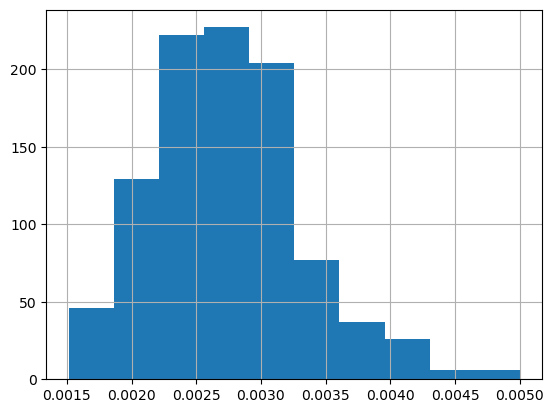

In [35]:
df_2["BMI"].hist()

<Axes: xlabel='BMI', ylabel='PremiumPrice'>

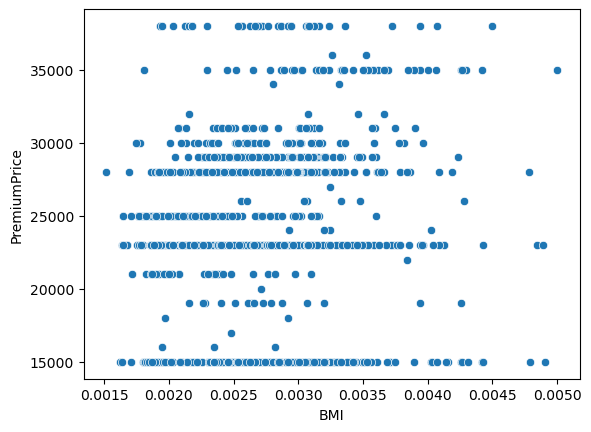

In [36]:
sns.scatterplot(data = df_2, x = "BMI", y="PremiumPrice")

**Insights:**

This scatter plot shows the relationship between BMI and PremiumPrice. The key insights are as follows:

**1. No Strong Linear Relationship:** There appears to be no clear linear correlation between BMI and PremiumPrice, as the data points are widely scattered without a defined upward or downward trend.

**2. BMI Distribution:** Most BMI values are concentrated between 0.0020 and 0.0040, with fewer data points at the extremes. This range is where the majority of premiums are observed, but no clear pattern emerges that connects BMI directly to premium variations.

**3. Outliers:** There are some points with higher or lower premium prices that appear scattered throughout different BMI values. These could be due to unique cases or outliers in other features that influence PremiumPrice.

In summary, while BMI may be a factor in determining PremiumPrice, this plot alone does not show a strong or straightforward relationship, suggesting that other factors may play a more significant role in determining premium amounts.

In [37]:
# dropping Height and Weight Feature from the dataset as we have generate a new Feature based on the Height and Weight.

<Axes: >

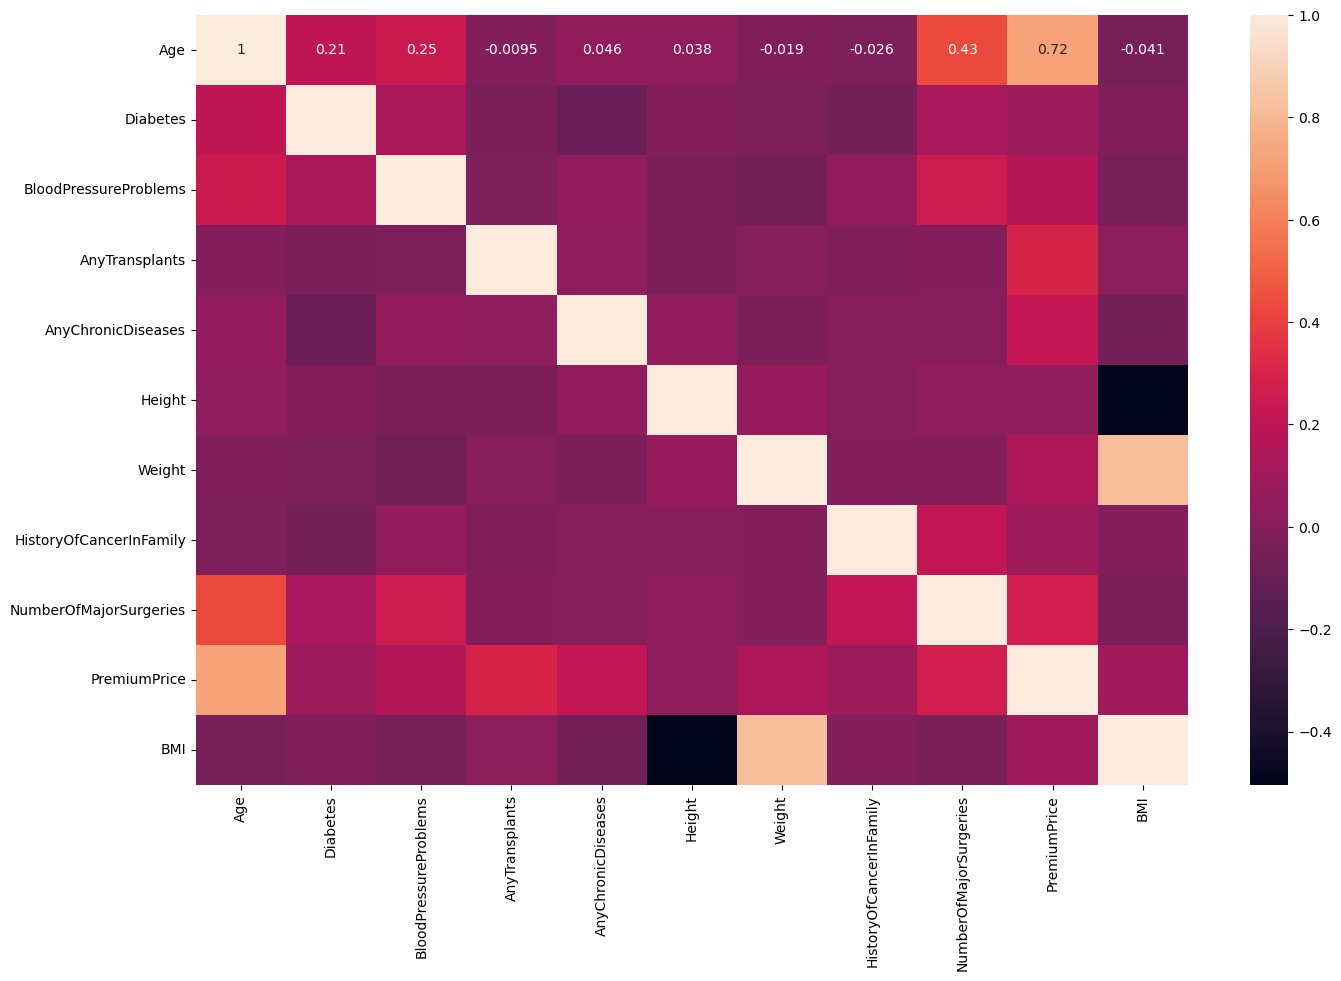

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(df_2.corr(), annot=True)

**Insights:**

This heatmap shows the correlation matrix for various features related to insurance premiums. Here are the key insights:

**1. Age and PremiumPrice:** There is a moderate positive correlation (approximately 0.43) between Age and PremiumPrice, indicating that older individuals tend to have higher premiums. This suggests age is an important factor in determining insurance premiums.

**2. Number of Major Surgeries and PremiumPrice:** The highest correlation with PremiumPrice is observed with NumberOfMajorSurgeries (approximately 0.72), suggesting that people with more major surgeries are likely to have higher premiums. This is likely due to the increased health risks and potential medical costs associated with individuals who have undergone multiple surgeries.

**3. Other Factors:** Most of the other features, such as Diabetes, BloodPressureProblems, and AnyTransplants, have relatively low correlations with PremiumPrice. This could indicate that these factors have a weaker influence on premium pricing when considered individually, though they may still play a role in combination with other factors.

**4. Low Correlation Among Medical Conditions:** The correlations between various medical conditions (like Diabetes, BloodPressureProblems, and HistoryOfCancerInFamily) are generally low, suggesting that these conditions are relatively independent of each other in this dataset.

**5. BMI:** BMI shows little to no correlation with PremiumPrice or any other variable, consistent with earlier observations that BMI alone may not significantly impact insurance premiums in this dataset.

In summary, NumberOfMajorSurgeries and Age appear to be the most influential factors for PremiumPrice in this dataset, while other medical conditions have weaker individual correlations with premium prices. This information can guide feature selection for predictive modeling, with emphasis on age and surgery history.

In [39]:
#dropping the BMI as it show little coreltion with the Target
df_2.drop("BMI", axis=1, inplace=True)

/var/folders/74/h3dx3wjx32q88lwd1x9sxyvw0000gn/T/ipykernel_20639/2834737236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop("BMI", axis=1, inplace=True)


In [40]:
df_2.shape

(980, 10)

In [41]:
df_2.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,25000
1,60,1,0,0,0,180,73,0,0,29000
2,36,1,1,0,0,158,59,0,1,23000
3,52,1,1,0,1,183,93,0,2,28000
4,38,0,0,0,1,166,88,0,1,23000


## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

X = df_2.drop("PremiumPrice", axis=1)
y = df_2["PremiumPrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

print("X_train:",X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (784, 9)
X_test: (196, 9)
y_train: (784,)
y_test: (196,)


## Standardization 

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate the class
X_train_sm = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sm, y_train)


LinearRegression()

In [45]:
model.score(X_train_sm, y_train)


0.6766766978551609

In [46]:
model.score(X_test_sm, y_test)

0.7221842823190048

**Insights:**

- The model is performing very bad on training and testing data both.
- Lets check Assumptions of Linear Regresion

## Checking Assumptions of Linear Regression

### 1. Assumption of Linearity

In [47]:
y_ptrain = model.predict(X_train)

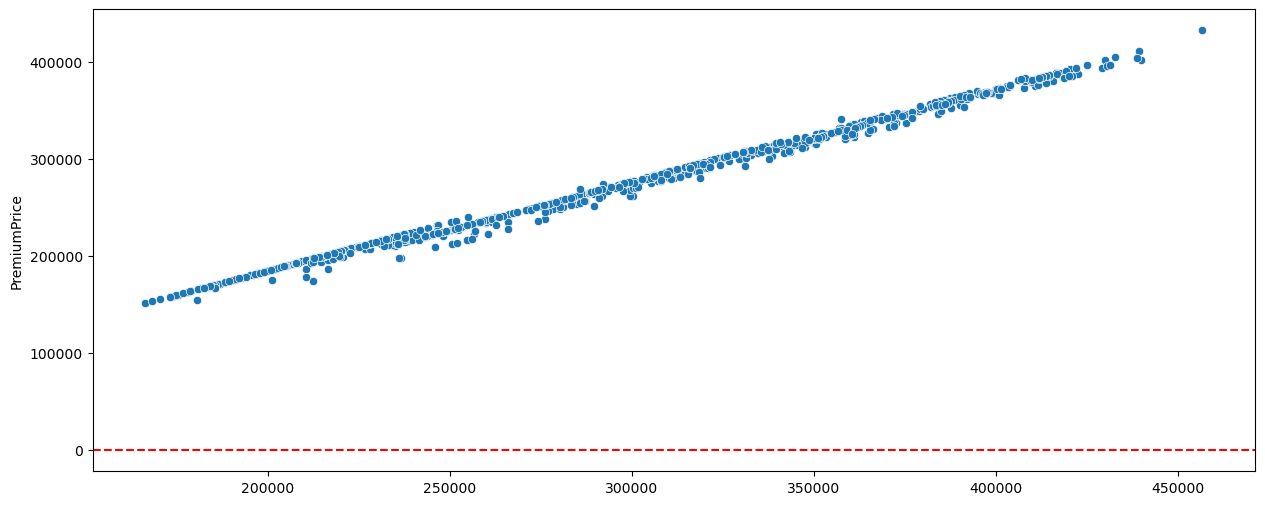

In [48]:
residuals = y_ptrain - y_train             # calculating the residuals
plt.figure(figsize=(15,6))                  # setting the dimensions of figure
sns.scatterplot(x=y_ptrain, y=residuals)    # plotting the scatter plot
plt.axhline(y=0, color='r', linestyle='--') # drawing a line at y=0
plt.ylabel("Residuals")
pl.xlabel("Predicted Values")
plt.show()

**Insights:**


- **Trend in Residuals:** There appears to be a noticeable upward trend in the residuals as the predicted values increase, rather than a random scatter around the zero line. This suggests that the model may not be capturing the relationship between predictors and the target variable properly, potentially indicating non-linearity in the data.

- **Non-Linearity:** A linear regression model assumes that the relationship between predictors and the target variable is linear. However, the pattern in this plot implies that the relationship may be nonlinear, as the residuals show a systematic pattern rather than random dispersion. This violates the linearity assumption of the model.

### 2. No Multicollinearity

In [49]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()                                     # creating a dataframe
X_t = pd.DataFrame(X_train_sm, columns = X_train_sm.columns)   
vif["features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [51]:
vif

,features,VIF
8,NumberOfMajorSurgeries,1.34
0,Age,1.31
2,BloodPressureProblems,1.13
7,HistoryOfCancerInFamily,1.07
1,Diabetes,1.06
4,AnyChronicDiseases,1.03
5,Height,1.02
6,Weight,1.02
3,AnyTransplants,1.01


**Insights:**

- VIF value lower than 5 wont show any multicollinearity, In the given dataframe - no features' VIF value go beyond 5. Therefore there is no multicollinearity in the given dataset

### 3. Normality of Residuals

To check the Normality of residuals, we can follow these methods:

- Residual Histogram
- Q-Q Plot
- Shapiro Wilk test

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


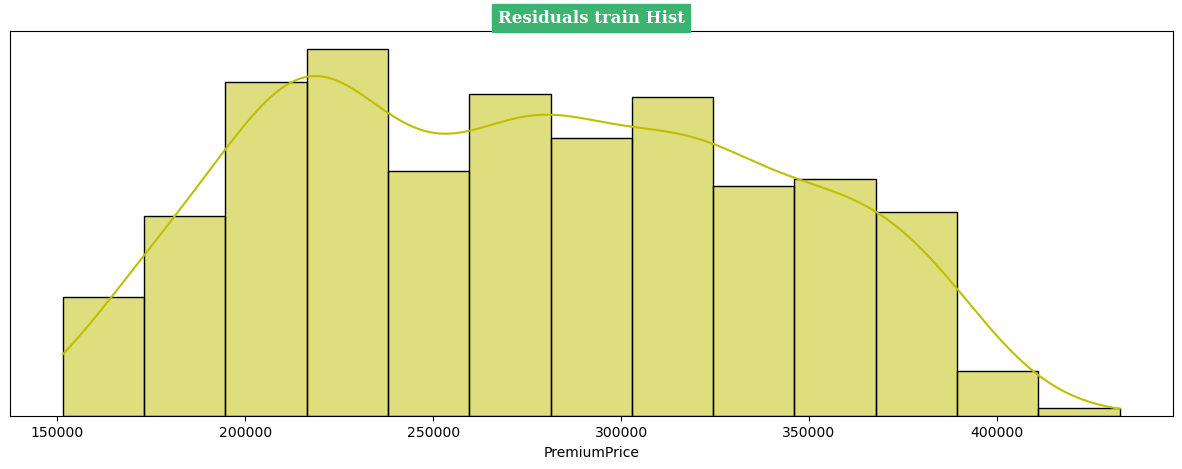

In [52]:
plt.figure(figsize=(15,5))                  # setting the dimension of figure
sns.histplot(residuals, kde=True, color="y")   # plotting the testing residuals
plt.title('Residuals train Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
#sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

**Insights:**

- **Histogram Shape:** The distribution of residuals is slightly right-skewed, with more residuals concentrated around 0 but some positive values extending to a high range. The skewness in the residuals indicates that the model might not fully satisfy the assumption of normality of errors.

- **Normality Assessment:** For the residuals to be normally distributed, the histogram should resemble a symmetric, bell-shaped curve centered around 0. Here, however, the distribution appears to be skewed, which suggests the residuals are not perfectly normal.
Non-normal residuals can impact the validity of hypothesis testing and confidence intervals associated with the model coefficients.


Text(0, 0.5, 'Residuals')

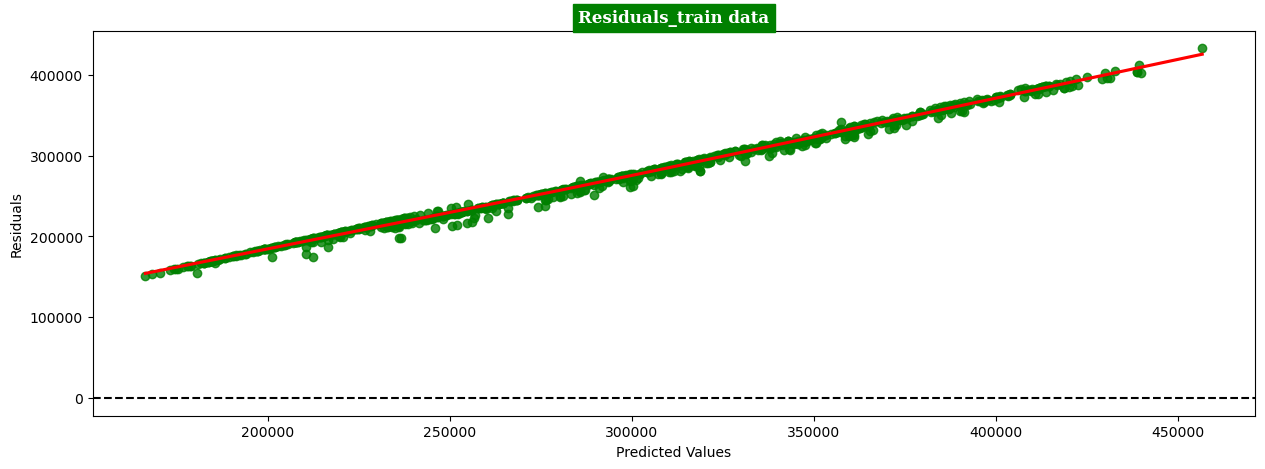

In [53]:
#residuals vs train data plot
plt.figure(figsize=(15,5))
plt.subplot()
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_ptrain, y=residuals, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

<Figure size 1500x500 with 0 Axes>

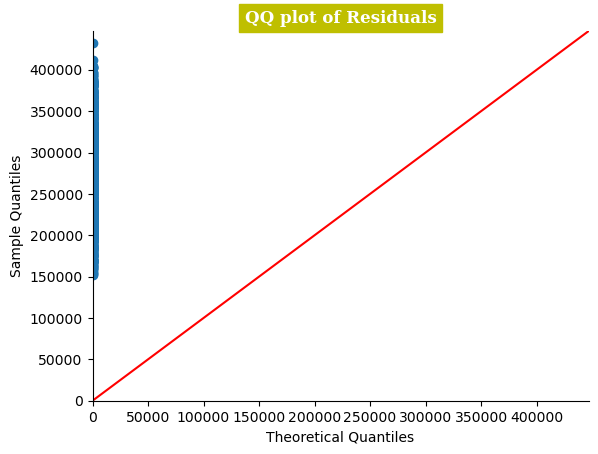

In [54]:
# Q-Q plot
import statsmodels.stats.api as sms
import statsmodels.api as sm
plt.figure(figsize=(15,5))
sm.qqplot(residuals, line = "45")
plt.title("QQ plot of Residuals", fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
sns.despine()
#plt.ylim(-0.15, 0.25)
plt.show()

**Insights:**

- **Deviations from the Line:** The points are heavily clustered around zero and deviate significantly from the 45-degree line. This pattern indicates that the residuals do not follow a normal distribution.

- **Implications:** Non-normally distributed residuals can affect the validity of hypothesis tests and confidence intervals in linear regression, and they suggest that the model might not be capturing all the patterns in the data.

## 4. No Hetroscedescity

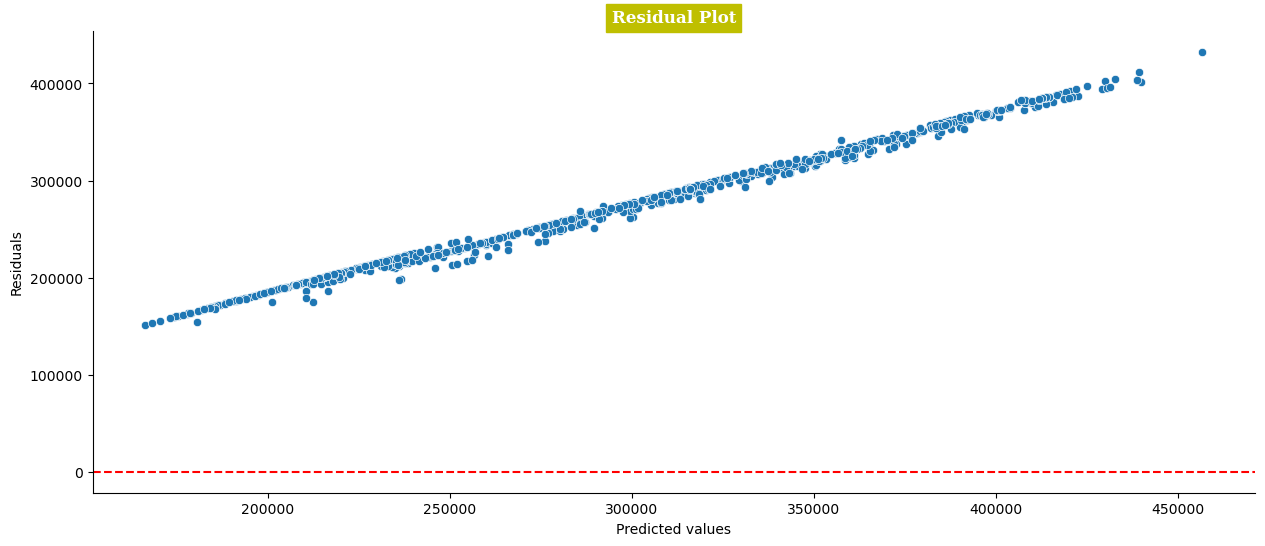

In [55]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_ptrain, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot',fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
sns.despine()
plt.show()

**Insights:**

- Ideally, the residuals should be randomly scattered around zero, with no discernible trend. In this plot, the points are somewhat scattered around the zero line, though there is a slight upward spread, indicating possible issues with the model's assumptions. However, it appears that the residual spread widens slightly as predicted values increase, potentially indicating mild heteroscedasticity.

### Asumptions of Linear Regression are not met.
- We will be using other methods to fit the data for better predictions

# Decision Tree Regressor

In [56]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample data (replace with your actual dataset)
# Assuming X is your feature matrix and y is your target variable
# Example: X, y = load_your_data()

# Initialize the Decision Tree Regressor
# You can adjust the parameters like max_depth, min_samples_split, etc., as needed
model_1 = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
model_1.fit(X_train, y_train)

# Predict on test data
y_pred = model_1.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_train, model_1.predict(X_train))
print(f"Mean Squared Error_train: {mse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error_test: {mse}")

r2_tr = r2_score(y_train, model_1.predict(X_train))
print(f"r2_score_train:{r2_tr}")

r2_te = r2_score(y_test, y_pred)
print(f"r2_score_test:{r2_te}")




Mean Squared Error_train: 4815513.855110183
Mean Squared Error_test: 3984617.833545815
r2_score_train:0.8749775031345924
r2_score_test:0.8872685478478601


In [57]:
def regression_metrics(y_true, y_pred, num_features):
    # R-squared
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R-squared
    n = len(y_true)  # number of samples
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    
    # Mean Squared Error
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    
    return {
        "R²": r2,
        "Adjusted R²": adj_r2,
        "MSE": mse,
        "RMSE": rmse
    }

print("Metrics on Training Data")
regression_metrics(y_train, model_1.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.8749775031345924,
 'Adjusted R²': 0.8735237531710411,
 'MSE': 4815513.855110183,
 'RMSE': 2194.4279106660542}

In [58]:
print("Metrics on Testing Data")
regression_metrics(y_test, model_1.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.8872685478478601,
 'Adjusted R²': 0.8818138001630792,
 'MSE': 3984617.833545815,
 'RMSE': 1996.150754213172}

In [59]:

from sklearn.model_selection import GridSearchCV

# Define the model
model_2 = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],                # Minimum samples required to be a leaf node
  
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}


In [60]:
print("Metrics on Training Data")
regression_metrics(y_train, best_model.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.9187516982442603,
 'Adjusted R²': 0.9178069505494261,
 'MSE': 3129455.35898342,
 'RMSE': 1769.0266699469005}

In [61]:
print("Metrics on Testing Data")
regression_metrics(y_test, best_model.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.9057191417038783,
 'Adjusted R²': 0.9011571646895499,
 'MSE': 3332461.1912364247,
 'RMSE': 1825.5029967755256}

**Insights:**

**1.Decision Tree Regressor without Hyperparameter Tuning:** The metrics we get on testing data is - 
 - 'R²': 0.8872685478478601,
 - 'Adjusted R²': 0.8818138001630792,
 - 'MSE': 3984617.833545815,
 - 'RMSE': 1996.150754213172}

**2. Decision Tree Regressor with Hyperparameter Tuning:** The metrics we get on testing data is - 
 - 'R²': 0.9057191417038783
 - 'Adjusted R²': 0.9011571646895499
 - 'MSE': 3332461.1912364247
 - 'RMSE': 1825.5029967755256

 



# Random Forest Regressor - Bagging Method

In [62]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data (replace with your actual dataset)
# Assuming X is your feature matrix and y is your target variable
# Example: X, y = load_your_data()


# Initialize the Random Forest Regressor
# You can adjust the parameters like n_estimators, max_depth, etc., as needed
model_3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_3.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [63]:
print("Metrics on Training Data")
regression_metrics(y_train, model_3.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.9764018096698961,
 'Adjusted R²': 0.9761274121079181,
 'MSE': 908935.7142857143,
 'RMSE': 953.3812009294678}

In [64]:
print("Metrics on Testing Data")
regression_metrics(y_test, model_3.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.9125151727429124,
 'Adjusted R²': 0.9082820359401501,
 'MSE': 3092247.9591836734,
 'RMSE': 1758.478876524729}

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
model_4 = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150, 200],             # Number of trees in the forest
    'max_depth': [3,5,10,15,20,30],            # Maximum depth of the tree
    'max_leaf_nodes': [20, 40, 50, 80],            # Minimum samples required to split a node
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be a leaf nod 
                           
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_4, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model_4 = grid_search.best_estimator_


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found:  {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [66]:
print("Metrics on Training Data")
regression_metrics(y_train, best_model_4.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.8962252752858538,
 'Adjusted R²': 0.8950185924403405,
 'MSE': 3997109.6178729865,
 'RMSE': 1999.2772738849874}

In [67]:
print("Metrics on Testing Data")
regression_metrics(y_test, best_model_4.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.9305468801582204,
 'Adjusted R²': 0.9271862453271665,
 'MSE': 2454897.321321312,
 'RMSE': 1566.811195173596}

**Insights:**

**1.Random Forest Regressor without Hyperparameter Tuning:** The metrics we get on testing data is - 
 - 'R²': 0.9125151727429124
 - 'Adjusted R²': 0.9082820359401501
 - 'MSE': 3092247.9591836734
 - 'RMSE': 1758.478876524729

**2. Random Forest Regressor with Hyperparameter Tuning:** The metrics we get on testing data is - 
 - 'R²': 0.9305468801582204
 - 'Adjusted R²': 0.9271862453271665
 - 'MSE': 2454897.321321312
 - 'RMSE': 1566.811195173596

# Gradient Boosting 

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
model_5 = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],             # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],                      # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required to be a leaf node
    'subsample': [0.8, 0.9, 1.0]                 # Fraction of samples used for each tree
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_5, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model_5 = grid_search.best_estimator_
y_pred = best_model_5.predict(X_test)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}


In [69]:
print("Metrics on Training Data")
regression_metrics(y_train, best_model_5.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.9589930366316614,
 'Adjusted R²': 0.9585162114762156,
 'MSE': 1579472.5366012752,
 'RMSE': 1256.770677809311}

In [70]:
print("Metrics on Testing Data")
regression_metrics(y_test, best_model_5.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.9135044830832413,
 'Adjusted R²': 0.9093192161356562,
 'MSE': 3057279.6912360047,
 'RMSE': 1748.5078470616038}

**Insights:**

**1. Gradient Boosting Regressor with Hyperparameter Tuning:** The metrics we get on testing data is -
 - 'R²': 0.9135044830832413
 - 'Adjusted R²': 0.9093192161356562
 - 'MSE': 3057279.6912360047
 - 'RMSE': 1748.5078470616038

# XGBoost Regressor

In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the model
model_6 = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],                   # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 0.9, 1.0],             # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0]       # Subsample ratio of columns when constructing each tree
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_6, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model_6 = grid_search.best_estimator_



Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}


In [72]:
print("Metrics on Training Data")
regression_metrics(y_train, best_model_6.predict(X_train), X_train.shape[1])

Metrics on Training Data


{'R²': 0.9512492073910617,
 'Adjusted R²': 0.9506823377095623,
 'MSE': 1877742.991396786,
 'RMSE': 1370.3076265557256}

In [73]:
print("Metrics on Testing Data")
regression_metrics(y_test, best_model_6.predict(X_test), X_test.shape[1])

Metrics on Testing Data


{'R²': 0.9174297551699846,
 'Adjusted R²': 0.9134344207427258,
 'MSE': 2918536.608806367,
 'RMSE': 1708.3725029414302}

**Insights:**

**1. XGBoost Regressor with Hyperparameter Tuning:** The metrics we get on testing data is -

 - 'R²': 0.9174297551699846
 - 'Adjusted R²': 0.9134344207427258
 - 'MSE': 2918536.608806367
 - 'RMSE': 1708.3725029414302

# Comparison of Various Models:

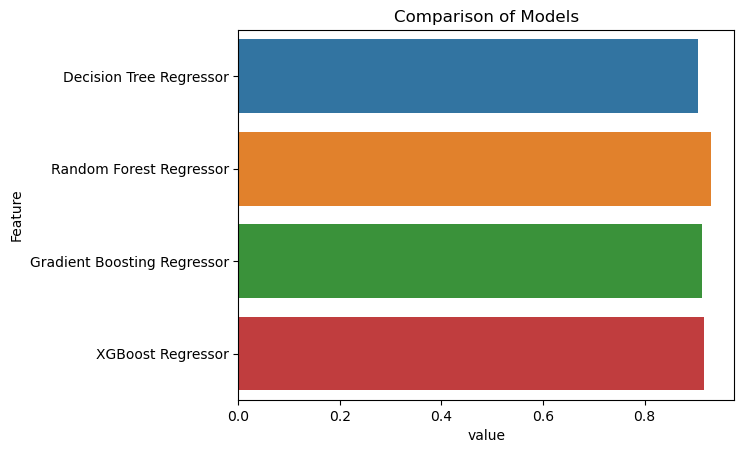

In [96]:
results = []
m_name = ["Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor", "XGBoost Regressor"]
m_bm = [best_model, best_model_4, best_model_5, best_model_6]

for name, model in zip(m_name, m_bm):
    results.append({"Feature": name, "value": model.score(X_test, y_test)})

a = pd.DataFrame(results)

sns.barplot(x = a["value"], y = a["Feature"])
plt.title("Comparison of Models")
plt.show()




- All four models have similar performance, as the bars are close in length. However, some differences are still visible.
- Random Forest Regressor appears to have a slightly higher score than the other models, suggesting it performs the best among the four.

- The Decision Tree Regressor is slightly lower than the ensemble models, which aligns with typical findings, as ensemble models often enhance predictive power by combining multiple trees.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


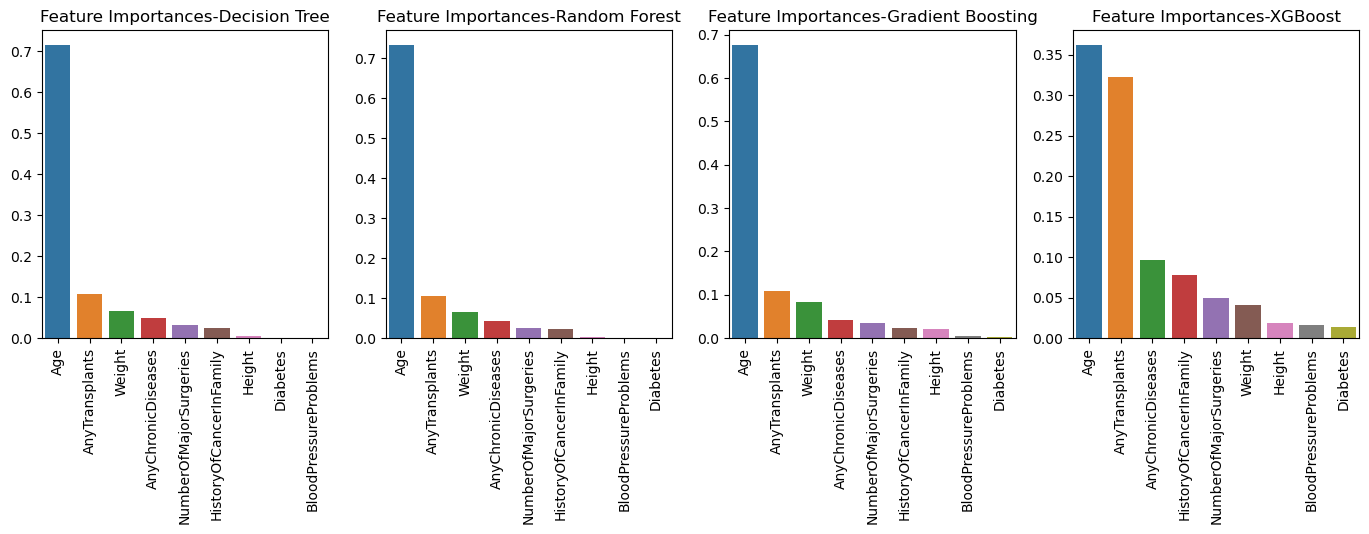

In [132]:
plt.figure(figsize=(17,4))
plt.subplot(1,4,1)


plt.subplot(1,4,1)
feature_imp = (best_model.feature_importances_)
ind = np.argsort(feature_imp)[::-1]
ftr = [X_train.columns[i] for i in ind]
val = [feature_imp[i] for i in ind]
sns.barplot(y = val, x=ftr)
plt.xticks(rotation = 90)
plt.title("Feature Importances-Decision Tree")

plt.subplot(1,4,2)
feature_imp = (best_model_4.feature_importances_)
ind = np.argsort(feature_imp)[::-1]
ftr = [X_train.columns[i] for i in ind]
val = [feature_imp[i] for i in ind]
sns.barplot(y = val, x=ftr)
plt.xticks(rotation = 90)
plt.title("Feature Importances-Random Forest")

plt.subplot(1,4,3)
feature_imp = (best_model_5.feature_importances_)
ind = np.argsort(feature_imp)[::-1]
ftr = [X_train.columns[i] for i in ind]
val = [feature_imp[i] for i in ind]
sns.barplot(y = val, x=ftr)
plt.xticks(rotation = 90)
plt.title("Feature Importances-Gradient Boosting")

plt.subplot(1,4,4)
feature_imp = (best_model_6.feature_importances_)
ind = np.argsort(feature_imp)[::-1]
ftr = [X_train.columns[i] for i in ind]
val = [feature_imp[i] for i in ind]
sns.barplot(y = val, x=ftr)
plt.xticks(rotation = 90)
plt.title("Feature Importances-XGBoost")
plt.show()

**Insights:**

- **Dominant Feature:** Across all models (Decision Tree, Random Forest, Gradient Boosting, and XGBoost), Age consistently shows the highest importance. This suggests that Age is the most significant predictor among the features used for predicting the target variable in your dataset.
  
- **Secondary Features:** After Age, AnyTransplants holds moderate importance across models. This feature might be strongly associated with the target variable, indicating that individuals with or without transplants contribute distinctively to the predictions.
Weight and AnyChronicDiseases also appear frequently as moderately important features, though they vary slightly in ranking between models.
Less Important Features:

- Features such as Height, Diabetes, and BloodPressureProblems consistently have low feature importance scores across all models. This implies they have minimal impact on the prediction and might even be candidates for removal if you’re looking to simplify the model (unless they have other interpretative or clinical relevance).
Model Differences:

- The XGBoost model shows a more diversified spread of feature importance across the top features compared to the others. While Age is still dominant, AnyTransplants and AnyChronicDiseases are comparatively more significant here, indicating that XGBoost might be capturing more nuanced relationships between these features and the target.
Model Interpretability:

- Decision Tree and Random Forest models show highly concentrated importance around Age. This can sometimes happen in simpler models, where the main splitting criterion becomes dominant. XGBoost and Gradient Boosting, on the other hand, distribute importance slightly more, suggesting they capture more complex patterns.

## **Final Insights:**

- Out of all the models, Random Forest Regressor with Hyperparameter Tuning performs the best and adjusted r2 score we get on the testing dataset is around 92%. 